<a href="https://colab.research.google.com/github/nezuk00/Lab1secondcourse/blob/main/1-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Student:
    def __init__(self, name, group, grades):
        self.name = name
        self.group = group
        self.grades = list(map(float, grades))

    def average_grade(self):
        return sum(self.grades) / len(self.grades)

    def is_excellent(self):
        return self.average_grade() >= 4.5

students = []
with open("students.txt", "r", encoding="utf-8") as f:
    for line in f:
        name, group, grades_str = line.strip().split(";")
        grades = grades_str.split(",")
        students.append(Student(name, group, grades))

with open("excellent_students.txt", "w", encoding="utf-8") as f:
    for s in students:
        if s.is_excellent():
            f.write(f"{s.name} - {s.group}\n")

from collections import defaultdict
group_grades = defaultdict(list)

for s in students:
    group_grades[s.group].append(s.average_grade())

for group, avgs in group_grades.items():
    print(f"Группа {group}: средний балл = {sum(avgs)/len(avgs):.2f}")

Группа A1: средний балл = 4.33
Группа B2: средний балл = 4.67


In [ ]:
import re

log_data = '''2025-09-13 14:30:12 INFO User JOHN_DOE logged in from 192.168.0.1
2025-09-13 14:31:05 ERROR Connection to SERVER failed from 10.0.0.55
2025-09-13 14:31:20 WARN Security alert: suspicious activity from 172.16.0.3
Contact admin at admin@example.com for further information.
A second admin uses ADMIN@EXAMPLE.ORG
'''

ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
timestamp_pattern = re.compile(r'\b\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\b')
uppercase_pattern = re.compile(r'\b[A-Z]{2,}\b')  # two or more uppercase letters
email_pattern = re.compile(r'[\w\.-]+@[\w\.-]+')

ips = ip_pattern.findall(log_data)
timestamps = timestamp_pattern.findall(log_data)
uppercase_words = uppercase_pattern.findall(log_data)

sanitized_log = email_pattern.sub('[EMAIL PROTECTED]', log_data)

print("IPv4 addresses found:", ips)
print("Timestamps found:", timestamps)
print("Uppercase words found:", uppercase_words)
print("""
Sanitized log (emails redacted):
""", sanitized_log)

IPv4 addresses found: ['192.168.0.1', '10.0.0.55', '172.16.0.3']
Timestamps found: ['2025-09-13 14:30:12', '2025-09-13 14:31:05', '2025-09-13 14:31:20']
Uppercase words found: ['INFO', 'ERROR', 'SERVER', 'WARN', 'ADMIN', 'EXAMPLE', 'ORG']

Sanitized log (emails redacted):
 2025-09-13 14:30:12 INFO User JOHN_DOE logged in from 192.168.0.1
2025-09-13 14:31:05 ERROR Connection to SERVER failed from 10.0.0.55
2025-09-13 14:31:20 WARN Security alert: suspicious activity from 172.16.0.3
Contact admin at [EMAIL PROTECTED] for further information.
A second admin uses [EMAIL PROTECTED]



Original DataFrame:


,Товар,Цена,Количество
0,A,100.0,10
1,B,200.0,5
2,A,110.0,12
3,C,150.0,8
4,B,NaN,6
5,A,105.0,11
6,C,160.0,9
7,A,100.0,10
8,B,210.0,7
9,C,155.0,8000



DataFrame after filling NaNs and removing outliers:


,Товар,Цена,Количество
0,A,100.0,10
1,B,200.0,5
2,A,110.0,12
3,C,150.0,8
4,B,150.0,6
5,A,105.0,11
6,C,160.0,9
7,A,100.0,10
8,B,210.0,7



DataFrame with 'Общая_стоимость':


,Товар,Цена,Количество,Общая_стоимость
0,A,100.0,10,1000.0
1,B,200.0,5,1000.0
2,A,110.0,12,1320.0
3,C,150.0,8,1200.0
4,B,150.0,6,900.0
5,A,105.0,11,1155.0
6,C,160.0,9,1440.0
7,A,100.0,10,1000.0
8,B,210.0,7,1470.0



Total revenue by product:


,Товар,Общая_стоимость
0,A,4475.0
1,B,3370.0
2,C,2640.0


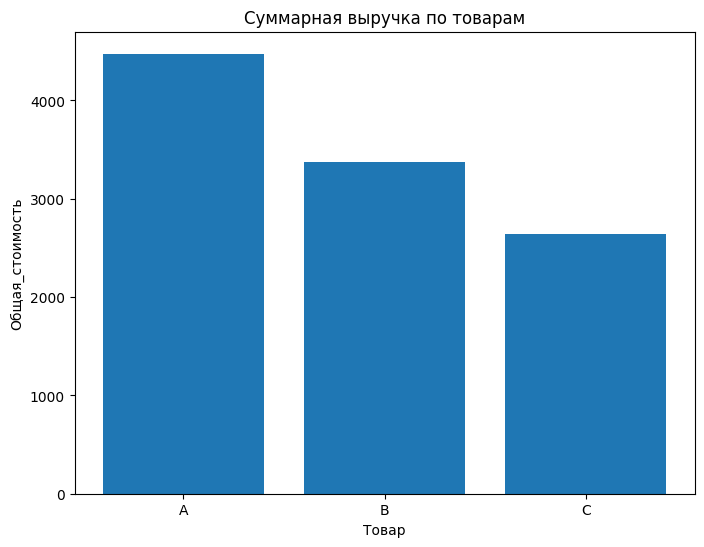

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Товар': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'A', 'B', 'C'],
    'Цена': [100, 200, 110, 150, np.nan, 105, 160, 100, 210, 155],
    'Количество': [10, 5, 12, 8, 6, 11, 9, 10, 7, 8000] # Added an outlier
}
df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)

median_price = df['Цена'].median()
df['Цена'] = df['Цена'].fillna(median_price) # Modified to address FutureWarning

df_cleaned = df[(df['Количество'] >= 1) & (df['Количество'] <= 1000)].copy()


print("\nDataFrame after filling NaNs and removing outliers:")
display(df_cleaned)

df_cleaned['Общая_стоимость'] = df_cleaned['Цена'] * df_cleaned['Количество']

print("\nDataFrame with 'Общая_стоимость':")
display(df_cleaned)

revenue_by_product = df_cleaned.groupby('Товар')['Общая_стоимость'].sum().reset_index()

print("\nTotal revenue by product:")
display(revenue_by_product)

plt.figure(figsize=(8, 6))
plt.bar(revenue_by_product['Товар'], revenue_by_product['Общая_стоимость'])
plt.xlabel('Товар')
plt.ylabel('Общая_стоимость')
plt.title('Суммарная выручка по товарам')
plt.show()

In [ ]:
import numpy as np


A = np.random.randint(1, 11, size=(5, 5))
B = np.random.randint(1, 11, size=(5, 5))

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

element_wise_product = A * B
print("\nElement-wise product of A and B:")
print(element_wise_product)

matrix_product = np.dot(A, B)
print("\nMatrix product of A and B:")
print(matrix_product)

determinant_A = np.linalg.det(A)
print("\nDeterminant of A:", determinant_A)

transpose_B = B.T
print("\nTranspose of B:")
print(transpose_B)

try:
    inverse_A = np.linalg.inv(A)
    print("\nInverse of A:")
    print(inverse_A)
except np.linalg.LinAlgError:
    print("\nInverse of A cannot be calculated (matrix is singular).")

C = np.sum(A, axis=1)
print("\nVector C (sum of rows of A):")
print(C)

try:
    x = np.linalg.solve(A, C)
    print("\nSolution to A * x = C (vector x):")
    print(x)
except np.linalg.LinAlgError:
    print("\nCannot solve A * x = C (matrix A is singular or not square).")

Matrix A:
[[10  9  2  7  6]
 [ 7  5 10  6  5]
 [ 3  3  2  9  7]
 [ 7 10  3  2  2]
 [ 3  8  1 10  1]]

Matrix B:
[[ 4  2  2  2  4]
 [10  8  8 10  2]
 [ 1  2  2  7  2]
 [10  6  6 10  3]
 [ 3  7  9  7 10]]

Element-wise product of A and B:
[[40 18  4 14 24]
 [70 40 80 60 10]
 [ 3  6  4 63 14]
 [70 60 18 20  6]
 [ 9 56  9 70 10]]

Matrix product of A and B:
[[220 180 192 236 143]
 [163 145 155 229 126]
 [155 137 151 189 119]
 [157 126 130 169  80]
 [196 139 141 200  70]]

Determinant of A: -16300.99999999998

Transpose of B:
[[ 4 10  1 10  3]
 [ 2  8  2  6  7]
 [ 2  8  2  6  9]
 [ 2 10  7 10  7]
 [ 4  2  2  3 10]]

Inverse of A:
[[ 2.80534937e-01  5.28801914e-02 -2.16121710e-01 -2.22869763e-01
   1.09809214e-02]
 [-1.57106926e-01 -6.26341942e-02  1.10974787e-01  2.39617201e-01
  -2.45383719e-04]
 [-1.03490583e-01  1.09073063e-01 -3.06729648e-04  3.91387031e-02
  -5.52113367e-04]
 [ 6.22047727e-02  2.98754678e-02 -4.90153978e-02 -1.45635237e-01
   1.11772284e-01]
 [-1.03306546e-01 -6.539476

In [ ]:
import math

def safe_apply(func, data):
    """
    Applies a function to each element in a list, handling exceptions.

    Args:
        func: The function to apply.
        data: The list of data to apply the function to.

    Returns:
        A tuple containing:
            results: A list of successful results.
            errors: A list of tuples (element, exception) for failed applications.
    """
    results = []
    errors = []
    for element in data:
        try:
            result = func(element)
            results.append(result)
        except Exception as e:
            errors.append((element, type(e).__name__))
    return results, errors

# Demonstrate with a lambda function for square root
data_list = ['4', '16', 'text', '-25', '9.0']
sqrt_lambda = lambda x: math.sqrt(float(x))

results, errors = safe_apply(sqrt_lambda, data_list)

print("Successful results:", results)
print("Errors:", errors)

Successful results: [2.0, 4.0, 3.0]
Errors: [('text', 'ValueError'), ('-25', 'ValueError')]


In [ ]:
import time
import numpy as np

class Timer:
    def __enter__(self):
        self.start_time = time.time()
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        self.end_time = time.time()
        self.execution_time = self.end_time - self.start_time
        print(f"Execution time: {self.execution_time:.4f} seconds")

# Use the Timer context manager for the matrix operations from Task 4

with Timer():
    # Generate two random 5x5 matrices
    A = np.random.randint(1, 11, size=(5, 5))
    B = np.random.randint(1, 11, size=(5, 5))

    print("Matrix A:")
    print(A)
    print("\nMatrix B:")
    print(B)

    # Element-wise product
    element_wise_product = A * B
    print("\nElement-wise product of A and B:")
    print(element_wise_product)

    # Matrix product
    matrix_product = np.dot(A, B)
    print("\nMatrix product of A and B:")
    print(matrix_product)

    # Determinant of A
    determinant_A = np.linalg.det(A)
    print("\nDeterminant of A:", determinant_A)

    # Transpose of B
    transpose_B = B.T
    print("\nTranspose of B:")
    print(transpose_B)

    # Inverse of A
    try:
        inverse_A = np.linalg.inv(A)
        print("\nInverse of A:")
        print(inverse_A)
    except np.linalg.LinAlgError:
        print("\nInverse of A cannot be calculated (matrix is singular).")

    # Solve linear system A * x = C, where C is the sum of rows of A
    C = np.sum(A, axis=1)
    print("\nVector C (sum of rows of A):")
    print(C)

    try:
        x = np.linalg.solve(A, C)
        print("\nSolution to A * x = C (vector x):")
        print(x)
    except np.linalg.LinAlgError:
        print("\nCannot solve A * x = C (matrix A is singular or not square).")

Matrix A:
[[ 2  9  6  3  3]
 [ 8  5 10  2  4]
 [ 8  4  5  1  8]
 [ 5  7  9  9  4]
 [ 4  1  1  7  8]]

Matrix B:
[[ 2 10  3  5  4]
 [ 6  8 10  5  2]
 [ 5  6  1 10  2]
 [ 1  8  7  6  9]
 [ 3  4  2  1  4]]

Element-wise product of A and B:
[[  4  90  18  15  12]
 [ 48  40 100  10   8]
 [ 40  24   5  10  16]
 [  5  56  63  54  36]
 [ 12   4   2   7  32]]

Matrix product of A and B:
[[100 164 129 136  77]
 [110 212 106 181  96]
 [ 90 182  92 124  91]
 [118 248 165 208 149]
 [ 50 142  88  85 115]]

Determinant of A: 3041.9999999999995

Transpose of B:
[[ 2  6  5  1  3]
 [10  8  6  8  4]
 [ 3 10  1  7  2]
 [ 5  5 10  6  1]
 [ 4  2  2  9  4]]

Inverse of A:
[[-0.52071006 -0.83431953  0.9408284   0.83431953 -0.74556213]
 [-0.06574622 -0.47403024  0.44707429  0.36291913 -0.36686391]
 [ 0.33530572  0.81755424 -0.7800789  -0.65088757  0.57100592]
 [-0.156476   -0.24819198  0.16403682  0.30374753 -0.13313609]
 [ 0.36357659  0.59138725 -0.57232084 -0.6469428   0.5887574 ]]

Vector C (sum of rows of 

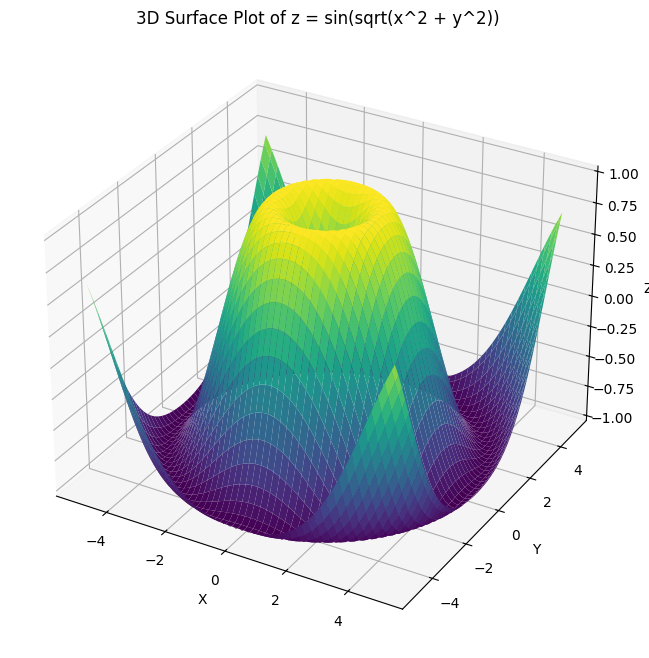

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)


Z = np.sin(np.sqrt(X**2 + Y**2))


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot of z = sin(sqrt(x^2 + y^2))')


plt.show()